In [31]:
import numpy as np
import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt
# 주피터 내장
%matplotlib inline
# 한글처리 
import platform
from matplotlib import font_manager, rc

# 한글처리
plt.rcParams['axes.unicode_minus'] = False
if platform.system() == 'Darwin':    # 맥
#     font_list_mac = fm.OSXInstalledFonts()
    rc( 'font', family='AppleGothic' )
elif platform.system() == 'Linux': # 리눅스
    rc( 'font', family='NanumGothic' )
elif platform.system() == 'Windows': # 윈도우
    # 폰트 차후 확인
    # fontName = font_manager.FontProperties( fname=fontPath ).get_name()
    rc( 'font', family='NanumGothic' )
else:
    print('알수없는 시스템. 미적용')

In [ ]:
book_pro = pd.read_csv('./data/성인이_참여한_독서프로그램_종류_2011.csv', encoding='euc-kr', skiprows=1)
print(book_pro.isnull().sum())
print(book_pro.shape)
print("="*50)

book_pro = pd.read_csv('./data/성인이_참여한_독서프로그램_종류_2013.csv', encoding='euc-kr', skiprows=1)
print(book_pro.isnull().sum())
print(book_pro.shape)
print("="*50)

book_pro = pd.read_csv('./data/성인이_참여한_독서프로그램_종류_2015.csv', encoding='euc-kr', skiprows=1)
print(book_pro.isnull().sum())
print(book_pro.shape)
print("="*50)

book_pro = pd.read_csv('./data/성인이_참여한_독서프로그램_종류_2017.csv', encoding='euc-kr', skiprows=1)
print(book_pro.isnull().sum())
print(book_pro.shape)

# 모두 결측치 없다!!

# 2011은 살펴봐야 한다.
# 칼럼 수가 차이난다. => 2011년에만 사례수 칼럼을 NaN으로 생성

In [56]:
book_pro = pd.read_csv('./data/성인이_참여한_독서프로그램_종류_2011.csv', encoding='euc-kr', skiprows=1)

In [57]:
book_pro

,통계분류(1),통계분류(2),독서캠페인,독후활동,독서행사,독서교육,독서치료,기타 활동
0,전체,소계,27.7,26.0,24.9,17.6,4.8,1.6
1,성별,남자,38.7,25.4,31.8,3.4,4.1,0.0
2,성별,여자,23.0,26.2,22.0,23.6,5.1,2.3


# 2011년은 통계적으로 적합하지 않아 제외했음

# 전체 전처리 코드 
- 얘는 칼럼이 정해져있고 결측치가 없었음
- 연도 칼럼 만들고 붙여주기만 했음

In [12]:
li = [2017, 2015, 2013]
df_li = list()

for year in li:
    file_path = './data/성인이_참여한_독서프로그램_종류_{0}.csv'.format(year)
    book_pro = pd.read_csv(file_path, encoding='euc-kr', skiprows=1)
    
    # 칼럼명 변경
    dic = {
        "통계분류(1)":"대분류",
        "통계분류(2)":"소분류",
    }
    book_pro.rename( columns=dic, inplace=True )
    
    # 연도 칼럼 추가
    li = [year for i in range(0, book_pro.shape[0])]
    book_pro['연도'] = li
    
    df_li.append(book_pro)

book_pro_all = pd.concat([df_li[0], df_li[1], df_li[2]], ignore_index=True)
book_pro_all.to_csv('./output/book_program_2013_2017.csv', encoding='euc-kr', index=False)

In [14]:
book_pro_all = pd.concat([df_li[0], df_li[1], df_li[2]], ignore_index=True)

In [16]:
book_pro_all.to_csv('./output/book_program_2013_2017.csv', encoding='euc-kr', index=False)

# 시각화!!

In [22]:
book_pro_all.head(17)

,대분류,소분류,사례수,독서캠페인,독후활동,독서행사,독서교육,독서치료,기타 활동,연도
0,전체,소계,317,19.3,29.7,46.7,24.8,7.2,6.9,2017
1,성별,남자,137,15.0,29.4,56.7,21.5,4.5,5.4,2017
2,성별,여자,181,22.6,30.0,39.1,27.3,9.3,8.0,2017
3,연령,19~29세,108,14.1,43.5,45.3,23.9,4.3,2.8,2017
4,연령,30~39세,82,33.4,18.9,49.8,20.7,11.3,3.7,2017
5,연령,40~49세,68,21.9,30.6,43.6,24.4,4.7,12.6,2017
6,연령,50~59세,34,0.0,15.5,52.2,49.1,3.6,2.7,2017
7,연령,60세 이상,26,15.0,22.5,43.8,11.1,17.9,25.1,2017
8,학력,중졸이하,6,0.0,0.0,26.7,0.0,0.0,73.3,2017
9,학력,고졸/고퇴,62,33.0,36.0,40.0,22.0,6.3,7.7,2017


In [27]:
book_pro_all[book_pro_all.소분류 == '소계']

,대분류,소분류,사례수,독서캠페인,독후활동,독서행사,독서교육,독서치료,기타 활동,연도
0,전체,소계,317,19.3,29.7,46.7,24.8,7.2,6.9,2017
17,전체,소계,144,17.0,30.8,41.4,20.5,8.2,11.0,2015
34,전체,소계,77,10.3,36.4,45.0,18.9,1.0,8.2,2013


## 바그래프에 칼럼 3개씩 => 독서캠페인, 독후활동, 독서교육

### 파이그래프는 예시용으로 만들어보기

# 버리는 그래프

In [29]:
book_pro_all[book_pro_all.소분류 == '소계'].독후활동.values

array([29.7, 30.8, 36.4])

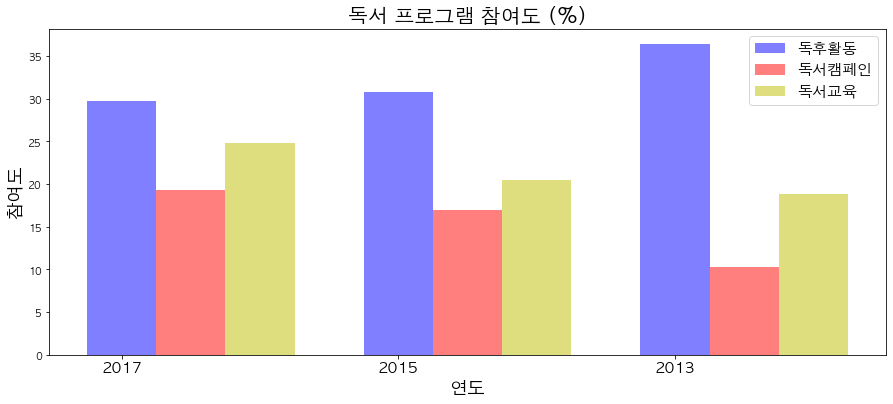

In [37]:
# Dodged Bar Chart (with same X coordinates side by side)
plt.rcParams['figure.figsize'] = [15, 6]

label = [2017, 2015, 2013]
index = np.arange(len(label))

bar_width = 0.25
alpha = 0.5

d1 = book_pro_all[book_pro_all.소분류 == '소계'].독후활동.values
d2 = book_pro_all[book_pro_all.소분류 == '소계'].독서캠페인.values
d3 = book_pro_all[book_pro_all.소분류 == '소계'].독서교육.values

p1 = plt.bar(index, d1, 
             bar_width, 
             color='b', 
             alpha=alpha,
             label='독후활동')

p2 = plt.bar(index + bar_width, d2, 
             bar_width, 
             color='r', 
             alpha=alpha,
             label='독서캠페인')

p3 = plt.bar(index + bar_width*2, d3, 
             bar_width, 
             color='y', 
             alpha=alpha,
             label='독서교육')

plt.title('독서 프로그램 참여도 (%)', fontsize=20)
plt.ylabel('참여도', fontsize=18)
plt.xlabel('연도', fontsize=18)
plt.xticks(index, label, fontsize=15)
plt.legend((p1[0], p2[0], p3[0]), ('독후활동', '독서캠페인', '독서교육'), fontsize=15)
plt.show()


# 쓸만한 그래프!!!!!!

In [49]:
book_pro_all[book_pro_all.소분류 == '소계'].loc[:, ['독후활동', '독서캠페인', '독서교육']].reset_index(drop=True)

,독후활동,독서캠페인,독서교육
0,29.7,19.3,24.8
1,30.8,17.0,20.5
2,36.4,10.3,18.9


In [48]:
book_pro_all[book_pro_all.소분류 == '소계'].loc[:, ['독후활동', '독서캠페인', '독서교육']].reset_index(drop=True).loc[2].values

array([36.4, 10.3, 18.9])

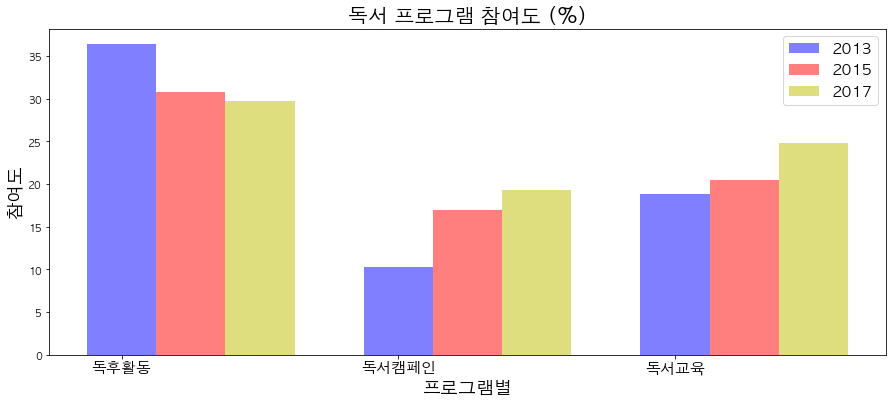

In [51]:
# Dodged Bar Chart (with same X coordinates side by side)
plt.rcParams['figure.figsize'] = [15, 6]

label = ['독후활동', '독서캠페인', '독서교육']
index = np.arange(len(label))

bar_width = 0.25
alpha = 0.5

data = book_pro_all[book_pro_all.소분류 == '소계'].loc[:, ['독후활동', '독서캠페인', '독서교육']].reset_index(drop=True)

d2013 = data.loc[2].values
d2015 = data.loc[1].values
d2017 = data.loc[0].values

p1 = plt.bar(index, d2013, 
             bar_width, 
             color='b', 
             alpha=alpha,
             label='2013')

p2 = plt.bar(index + bar_width, d2015, 
             bar_width, 
             color='r', 
             alpha=alpha,
             label='2015')

p3 = plt.bar(index + bar_width*2, d2017, 
             bar_width, 
             color='y', 
             alpha=alpha,
             label='2017')

plt.title('독서 프로그램 참여도 (%)', fontsize=20)
plt.ylabel('참여도', fontsize=18)
plt.xlabel('프로그램별', fontsize=18)
plt.xticks(index, label, fontsize=15)
plt.legend((p1[0], p2[0], p3[0]), ('2013', '2015', '2017'), fontsize=15)
plt.show()


# 버리는 그래프

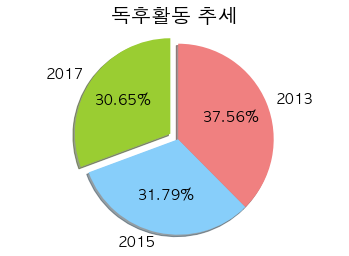

In [32]:
# information of groups
group_names = ['2017', '2015', '2013']
# group_data = [95, 54, 25]
data = book_pro_all[book_pro_all.소분류 == '소계'].독후활동.values
group_data = data
group_colors = ['yellowgreen', 'lightskyblue', 'lightcoral']
group_explodes = (0.1, 0, 0) # explode 1st slice

# Pie chart
plt.pie(group_data, 
        explode=group_explodes, 
        labels=group_names, 
        colors=group_colors, 
        autopct='%1.2f%%', # second decimal place
        shadow=True, 
        startangle=90,
        textprops={'fontsize': 14}) # text font size

plt.axis('equal') #  equal length of X and Y axis
plt.title('독후활동 추세', fontsize=20)
plt.show()

# 퍼센트를 내서 결과를 보여주기 때문에 의미가 사라진다..

In [5]:
book_pro.head(2)

,통계분류(1),통계분류(2),사례수,독서캠페인,독후활동,독서행사,독서교육,독서치료,기타 활동
0,전체,소계,317,19.3,29.7,46.7,24.8,7.2,6.9
1,성별,남자,137,15.0,29.4,56.7,21.5,4.5,5.4


In [6]:
dic = {
    "통계분류(1)":"대분류",
    "통계분류(2)":"소분류",
}


book_pro.rename( columns=dic, inplace=True )

In [7]:
book_pro

,대분류,소분류,사례수,독서캠페인,독후활동,독서행사,독서교육,독서치료,기타 활동
0,전체,소계,317,19.3,29.7,46.7,24.8,7.2,6.9
1,성별,남자,137,15.0,29.4,56.7,21.5,4.5,5.4
2,성별,여자,181,22.6,30.0,39.1,27.3,9.3,8.0
3,연령,19~29세,108,14.1,43.5,45.3,23.9,4.3,2.8
4,연령,30~39세,82,33.4,18.9,49.8,20.7,11.3,3.7
5,연령,40~49세,68,21.9,30.6,43.6,24.4,4.7,12.6
6,연령,50~59세,34,0.0,15.5,52.2,49.1,3.6,2.7
7,연령,60세 이상,26,15.0,22.5,43.8,11.1,17.9,25.1
8,학력,중졸이하,6,0.0,0.0,26.7,0.0,0.0,73.3
9,학력,고졸/고퇴,62,33.0,36.0,40.0,22.0,6.3,7.7


In [8]:
book_pro.대분류.unique()

array(['전체', '성별', '연령', '학력', '연간 독서량'], dtype=object)

In [10]:
li = [2017 for i in range(0, book_pro.shape[0])]
book_pro['연도'] = li
book_pro.연도

0     2017
1     2017
2     2017
3     2017
4     2017
5     2017
6     2017
7     2017
8     2017
9     2017
10    2017
11    2017
12    2017
13    2017
14    2017
15    2017
16    2017
Name: 연도, dtype: int64

In [ ]:
book_pro.head()